In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/brome_gene_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/brome_ortho_trimmed_out_2_gene_families.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/soybean_gene_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/soybean_ortho_trimmed_out_2_gene_families.csv', index_col= 0)

In [4]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [6]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10009at3193,173.000256,0.430426,0.242454,1.775288,7.585033e-02,1.273003e-01
10092at3193,260.781062,0.519181,0.152998,3.393376,6.903678e-04,1.904852e-03
10147at3193,426.832587,-0.208953,0.141672,-1.474906,1.402377e-01,2.135465e-01
10228at3193,1646.869190,0.430478,0.156549,2.749803,5.963109e-03,1.356038e-02
10488at3193,394.770119,-0.994054,0.353945,-2.808500,4.977288e-03,1.150893e-02
...,...,...,...,...,...,...
9828at3193,429.031629,0.235979,0.152430,1.548116,1.215944e-01,1.902134e-01
9836at3193,264.174162,-0.414411,0.164656,-2.516825,1.184175e-02,2.507813e-02
9877at3193,474.015423,0.159871,0.173605,0.920888,3.571087e-01,4.580196e-01
9919at3193,461.925167,1.723904,0.188059,9.166842,4.870796e-20,7.829191e-19


In [7]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


In [8]:
trimmed_arabi_ortho_named = trimmed_arabi_ortho.rename(columns = {'log2FoldChange':'Arabidopsis Log2FC'})
trimmed_tomato_ortho_named = trimmed_tomato_ortho.rename(columns = {'log2FoldChange':'Tomato Log2FC'})



In [9]:
merged_ortho_df = trimmed_arabi_ortho_named[['Arabidopsis Log2FC']].merge(right = trimmed_tomato_ortho_named, left_index= True, right_index = True)

In [10]:
merged_ortho_df

,Arabidopsis Log2FC,baseMean,Tomato Log2FC,lfcSE,stat,pvalue,padj
10772at3193,-0.823722,1432.514851,0.141324,0.096395,1.466092,1.426233e-01,2.167360e-01
10950at3193,0.609257,1504.589985,0.768931,0.130069,5.911713,3.385688e-09,2.105629e-08
109808at3193,-0.234491,81.928350,-0.724654,0.321686,-2.252679,2.427938e-02,4.721166e-02
109895at3193,-0.965963,34.756034,0.141902,0.317448,0.447008,6.548695e-01,7.391474e-01
109989at3193,-0.085234,438.013716,-0.142711,0.125299,-1.138971,2.547153e-01,3.491290e-01
...,...,...,...,...,...,...,...
9592at3193,-0.088107,714.567831,-1.004056,0.114738,-8.750851,2.117501e-18,3.047359e-17
9601at3193,0.012267,555.019544,-0.245262,0.172802,-1.419321,1.558055e-01,2.330127e-01
9609at3193,-2.083956,180.978946,-1.038789,0.284603,-3.649957,2.622840e-04,7.823873e-04
9789at3193,-0.323663,642.577002,-0.762086,0.124106,-6.140625,8.219721e-10,5.552505e-09


In [11]:
log_fc_change_evaluation_value

1.5

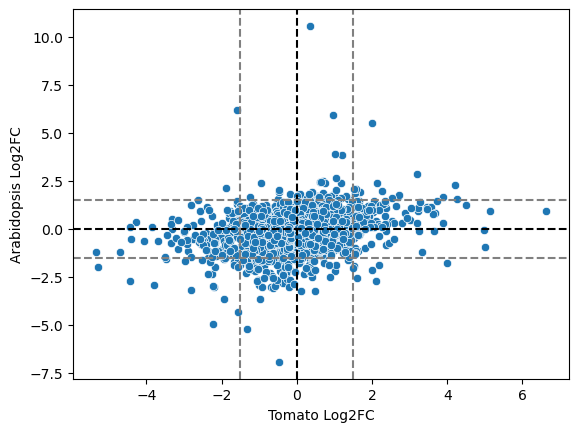

In [12]:
sns.scatterplot(data = merged_ortho_df, x ='Tomato Log2FC', y = 'Arabidopsis Log2FC' )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Orthogroup-wise log2-fold change in \n poplar Drought')

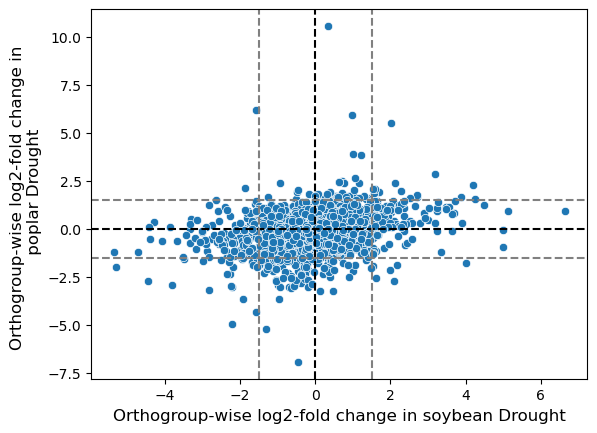

In [13]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Orthogroup-wise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in \n brome Drought", fontsize = 12)

In [14]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10772at3193,1253.808835,-0.823722,0.112959,-7.292232,3.048614e-13,2.621432e-12
10950at3193,2602.895885,0.609257,0.090454,6.735537,1.633256e-11,1.160778e-10
109808at3193,415.334713,-0.234491,0.124907,-1.877332,6.047254e-02,9.485954e-02
109895at3193,29.465058,-0.965963,0.410548,-2.352859,1.862971e-02,3.354311e-02
109989at3193,102.457293,-0.085234,0.206198,-0.413361,6.793419e-01,7.352940e-01
...,...,...,...,...,...,...
9592at3193,677.363236,-0.088107,0.105964,-0.831483,4.057006e-01,4.811075e-01
9601at3193,647.889907,0.012267,0.143439,0.085524,9.318447e-01,9.467977e-01
9609at3193,304.540836,-2.083956,0.221131,-9.424067,4.339454e-21,8.095794e-20
9789at3193,506.494370,-0.323663,0.111529,-2.902062,3.707147e-03,7.840165e-03


In [15]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [16]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]

In [17]:
merged_result['Classification'] = 'Non-substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_861687/2994845458.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'S

Text(0, 0.5, 'Orthogroup-wise log2-fold change in poplar Drought')

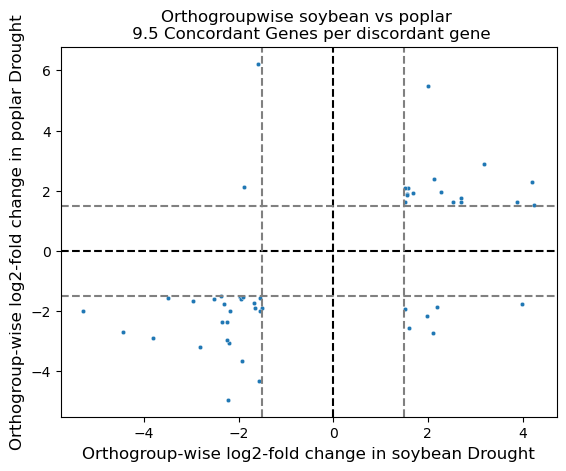

In [18]:
sns.scatterplot(data = merged_result.loc[merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Orthogroupwise soybean vs brome \n 9.5 Concordant Genes per discordant gene')
plt.xlabel("Orthogroup-wise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in brome Drought", fontsize = 12)

In [19]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

5.125

In [20]:
discord_bottom

,Tomato,Arabi
29,1.522077,-1.928150
1087,2.185773,-1.869063
1904,2.106442,-2.737350
2050,1.605068,-2.564105
2297,1.989399,-2.161249
2540,3.997364,-1.772877


In [21]:
discord_top

,Tomato,Arabi
295,-1.589639,6.213118
976,-1.881753,2.115764


In [22]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.9078776041666666
0.9078776041666666
0.9078776041666666
0.9078776041666666


In [23]:
arabi_disconcordant_change

,Tomato,Arabi
10,1.217503,-0.040479
29,1.522077,-1.928150
34,1.672570,-0.200683
39,1.012039,0.363159
40,2.377045,-0.833857
...,...,...
2993,1.393896,-0.661331
2995,1.239317,-0.283170
2997,5.132424,0.943523
3019,2.267969,0.105545


In [24]:
tomato_any_change

,Tomato,Arabi
0,0.141324,-0.823722
1,0.768931,0.609257
2,-0.724654,-0.234491
3,0.141902,-0.965963
4,-0.142711,-0.085234
...,...,...
3067,-1.004056,-0.088107
3068,-0.245262,0.012267
3069,-1.038789,-2.083956
3070,-0.762086,-0.323663


In [25]:
tomato_concordant_change

,Tomato,Arabi
0,0.141324,-0.823722
1,0.768931,0.609257
2,-0.724654,-0.234491
3,0.141902,-0.965963
4,-0.142711,-0.085234
...,...,...
3067,-1.004056,-0.088107
3068,-0.245262,0.012267
3069,-1.038789,-2.083956
3070,-0.762086,-0.323663


In [27]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/soybean_to_brome_ortholog_NM.csv')

In [28]:
arabidopsis_tomato_nm

,soybean OrthoGene,brome OrthoGene,Orthogroup,soybean Symbol,brome Symbol
0,3847_0:001d45,15368_0:004b9d,10009at3193,GLYMA_04G021200,LOC112268890
1,3847_0:002e23,15368_0:004b9d,10009at3193,GLYMA_06G021400,LOC112268890
2,3847_0:007f21,15368_0:004b9d,10009at3193,GLYMA_14G221800,LOC112268890
3,3847_0:009b10,15368_0:004b9d,10009at3193,GLYMA_17G260700,LOC112268890
4,3847_0:0022f2,15368_0:002acb,10092at3193,GLYMA_04G056600,LOC100824059
...,...,...,...,...,...
78753,3847_0:0048d1,15368_0:002eb5,9942at3193,GLYMA_08G068100,LOC100830624
78754,3847_0:00255c,15368_0:002fc6,9942at3193,LOC100810943,LOC100830933
78755,3847_0:0039db,15368_0:002fc6,9942at3193,GLYMA_07G181700,LOC100830933
78756,3847_0:00489a,15368_0:002fc6,9942at3193,GLYMA_08G126200,LOC100830933


In [30]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'brome Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'soybean Symbol',)
arabidopsis_tomato_nm

,soybean OrthoGene,brome OrthoGene,Orthogroup,soybean Symbol,brome Symbol
0,3847_0:001d45,15368_0:004b9d,10009at3193,GLYMA_04G021200,LOC112268890
4,3847_0:0022f2,15368_0:002acb,10092at3193,GLYMA_04G056600,LOC100824059
7,3847_0:001acf,15368_0:000aa9,10147at3193,GLYMA_03G107300,LOC100833000
12,3847_0:002544,15368_0:002644,10228at3193,GLYMA_05G233100,LOC100845189
14,3847_0:00393f,15368_0:002661,10238at3193,GLYMA_07G037800,LOC100843355
...,...,...,...,...,...
78717,3847_0:0028b8,15368_0:002f8c,9789at3193,LOC100796401,LOC100829470
78733,3847_0:001b3a,15368_0:005266,9828at3193,GLYMA_04G175400,LOC100832383
78736,3847_0:000e97,15368_0:00447e,9877at3193,GLYMA_02G288500,LOC100838601
78740,3847_0:005414,15368_0:001d76,9919at3193,GLYMA_09G084600,LOC100826227


In [31]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['soybean Symbol','brome Symbol']], right_on= 'brome Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'brome Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,brome Symbol
24009,23.936160,3.752967,0.582680,6.440867,1.187927e-10,8.209202e-10,GLYMA_08G247900,LOC100834957
75178,82.992119,-1.024906,0.271418,-3.776114,1.592942e-04,4.399304e-04,GLYMA_14G133100,LOC100844744
59066,1116.361775,0.079793,0.117593,0.678552,4.974215e-01,5.731693e-01,GLYMA_06G269900,LOC100842425
40411,1835.172729,-0.043313,0.114516,-0.378224,7.052646e-01,7.624134e-01,GSTT2,LOC100842114
77984,1619.499356,0.036739,0.111469,0.329591,7.417090e-01,7.931762e-01,GLYMA_09G136800,LOC100825490
...,...,...,...,...,...,...,...,...
54747,383.493361,-0.557131,0.142778,-3.902089,9.536616e-05,2.733387e-04,LOC100500664,LOC100839656
27299,879.417618,-1.742678,0.141708,-12.297706,9.318315e-35,5.246888e-33,LOC100793945,LOC100846269
45655,315.018439,0.042993,0.150568,0.285541,7.752298e-01,8.209775e-01,GLYMA_08G002800,LOC100846573
4446,201.259418,-1.296853,0.194851,-6.655620,2.821078e-11,2.106196e-10,GLYMA_04G243800,LOC100822302


In [32]:
arabidopsis_tomato_nm

,soybean OrthoGene,brome OrthoGene,Orthogroup,soybean Symbol,brome Symbol
0,3847_0:001d45,15368_0:004b9d,10009at3193,GLYMA_04G021200,LOC112268890
4,3847_0:0022f2,15368_0:002acb,10092at3193,GLYMA_04G056600,LOC100824059
7,3847_0:001acf,15368_0:000aa9,10147at3193,GLYMA_03G107300,LOC100833000
12,3847_0:002544,15368_0:002644,10228at3193,GLYMA_05G233100,LOC100845189
14,3847_0:00393f,15368_0:002661,10238at3193,GLYMA_07G037800,LOC100843355
...,...,...,...,...,...
78717,3847_0:0028b8,15368_0:002f8c,9789at3193,LOC100796401,LOC100829470
78733,3847_0:001b3a,15368_0:005266,9828at3193,GLYMA_04G175400,LOC100832383
78736,3847_0:000e97,15368_0:00447e,9877at3193,GLYMA_02G288500,LOC100838601
78740,3847_0:005414,15368_0:001d76,9919at3193,GLYMA_09G084600,LOC100826227


In [33]:
tomato_genes.head(50)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GLYMA_01G000322,22.036269,0.274457,0.476149,0.576410,5.643378e-01,6.539785e-01
GLYMA_01G000400,476.034338,0.037230,0.136237,0.273276,7.846409e-01,8.399009e-01
GLYMA_01G000600,368.857765,0.416337,0.144185,2.887511,3.883026e-03,9.043730e-03
GLYMA_01G000900,728.885736,0.680659,0.178505,3.813113,1.372273e-04,4.327456e-04
GLYMA_01G001000,442.703824,0.402593,0.168362,2.391231,1.679198e-02,3.345424e-02
GLYMA_01G001100,310.848726,-1.860885,0.207948,-8.948799,3.593697e-19,5.927628e-18
GLYMA_01G001200,116.511478,-0.951458,0.292023,-3.258158,1.121378e-03,2.948588e-03
GLYMA_01G001300,2248.774697,-0.508059,0.206564,-2.459568,1.391045e-02,2.835089e-02
GLYMA_01G001325,62.472507,0.251939,0.330521,0.762247,4.459127e-01,5.432384e-01
GLYMA_01G001600,312.141059,0.567635,0.171457,3.310661,9.307599e-04,2.492316e-03


In [34]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['soybean Symbol','brome Symbol']], right_on= 'soybean Symbol')
#tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'brome Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,brome Symbol
1037,476.034338,0.037230,0.136237,0.273276,7.846409e-01,8.399009e-01,GLYMA_01G000400,LOC100846077
10349,442.703824,0.402593,0.168362,2.391231,1.679198e-02,3.345424e-02,GLYMA_01G001000,LOC100835748
22007,310.848726,-1.860885,0.207948,-8.948799,3.593697e-19,5.927628e-18,GLYMA_01G001100,LOC100840646
59036,116.511478,-0.951458,0.292023,-3.258158,1.121378e-03,2.948588e-03,GLYMA_01G001200,LOC100843002
21433,2248.774697,-0.508059,0.206564,-2.459568,1.391045e-02,2.835089e-02,GLYMA_01G001300,LOC100835163
...,...,...,...,...,...,...,...,...
72102,409.430588,0.241802,0.199745,1.210555,2.260660e-01,3.140477e-01,GLYMA_20G248800,LOC100829027
29573,499.095619,0.025827,0.146622,0.176145,8.601802e-01,8.976651e-01,GLYMA_20G249100,LOC100832887
37403,1065.537055,0.557655,0.133712,4.170563,3.038481e-05,1.079335e-04,GLYMA_20G249400,LOC100843193
42491,1703.746016,0.582504,0.117478,4.958400,7.107616e-07,3.300776e-06,GLYMA_20G249700,LOC100828030


In [35]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,brome Symbol
1037,476.034338,0.037230,0.136237,0.273276,7.846409e-01,8.399009e-01,GLYMA_01G000400,LOC100846077
10349,442.703824,0.402593,0.168362,2.391231,1.679198e-02,3.345424e-02,GLYMA_01G001000,LOC100835748
22007,310.848726,-1.860885,0.207948,-8.948799,3.593697e-19,5.927628e-18,GLYMA_01G001100,LOC100840646
59036,116.511478,-0.951458,0.292023,-3.258158,1.121378e-03,2.948588e-03,GLYMA_01G001200,LOC100843002
21433,2248.774697,-0.508059,0.206564,-2.459568,1.391045e-02,2.835089e-02,GLYMA_01G001300,LOC100835163
...,...,...,...,...,...,...,...,...
72102,409.430588,0.241802,0.199745,1.210555,2.260660e-01,3.140477e-01,GLYMA_20G248800,LOC100829027
29573,499.095619,0.025827,0.146622,0.176145,8.601802e-01,8.976651e-01,GLYMA_20G249100,LOC100832887
37403,1065.537055,0.557655,0.133712,4.170563,3.038481e-05,1.079335e-04,GLYMA_20G249400,LOC100843193
42491,1703.746016,0.582504,0.117478,4.958400,7.107616e-07,3.300776e-06,GLYMA_20G249700,LOC100828030


In [36]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['brome Symbol'].isin(tomato_genes_trimmed['brome Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['soybean Symbol'].isin(arabi_genes_trimmed['soybean Symbol'])]


In [37]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol,brome Symbol
1037,476.034338,0.037230,0.136237,0.273276,7.846409e-01,8.399009e-01,GLYMA_01G000400,LOC100846077
10349,442.703824,0.402593,0.168362,2.391231,1.679198e-02,3.345424e-02,GLYMA_01G001000,LOC100835748
22007,310.848726,-1.860885,0.207948,-8.948799,3.593697e-19,5.927628e-18,GLYMA_01G001100,LOC100840646
59036,116.511478,-0.951458,0.292023,-3.258158,1.121378e-03,2.948588e-03,GLYMA_01G001200,LOC100843002
55501,312.141059,0.567635,0.171457,3.310661,9.307599e-04,2.492316e-03,GLYMA_01G001600,LOC100833468
...,...,...,...,...,...,...,...,...
72102,409.430588,0.241802,0.199745,1.210555,2.260660e-01,3.140477e-01,GLYMA_20G248800,LOC100829027
29573,499.095619,0.025827,0.146622,0.176145,8.601802e-01,8.976651e-01,GLYMA_20G249100,LOC100832887
37403,1065.537055,0.557655,0.133712,4.170563,3.038481e-05,1.079335e-04,GLYMA_20G249400,LOC100843193
42491,1703.746016,0.582504,0.117478,4.958400,7.107616e-07,3.300776e-06,GLYMA_20G249700,LOC100828030


In [38]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('brome Symbol')
          .reindex(arabi_genes_trimmed.set_index('brome Symbol').index)
          .reset_index()
       )

In [39]:
tomato_genes_trimmed

,brome Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,soybean Symbol
0,LOC100844744,257.558000,0.861340,0.206827,4.164547,3.119710e-05,1.106143e-04,GLYMA_14G133100
1,LOC100825490,589.678017,-0.144485,0.148426,-0.973447,3.303311e-01,4.279740e-01,GLYMA_09G136800
2,LOC100837010,45.066828,-0.067016,0.377704,-0.177431,8.591699e-01,8.967462e-01,GLYMA_04G239600
3,LOC100837316,38.466531,0.596413,0.334033,1.785493,7.418134e-02,1.219858e-01,GLYMA_10G230100
4,LOC100821843,558.143700,0.065794,0.165025,0.398694,6.901184e-01,7.632006e-01,GLYMA_09G224100
...,...,...,...,...,...,...,...,...
7585,LOC100838433,1361.733530,0.599615,0.155423,3.857952,1.143409e-04,3.660857e-04,GLYMA_10G283400
7586,LOC100845152,1331.703355,-1.570305,0.328035,-4.787008,1.692865e-06,7.406765e-06,GLYMA_13G357200
7587,LOC100839049,849.147630,0.173071,0.121378,1.425885,1.539015e-01,2.275662e-01,GLYMA_12G228700
7588,LOC100846573,187.993907,0.077090,0.196641,0.392035,6.950324e-01,7.671864e-01,GLYMA_08G002800


In [40]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

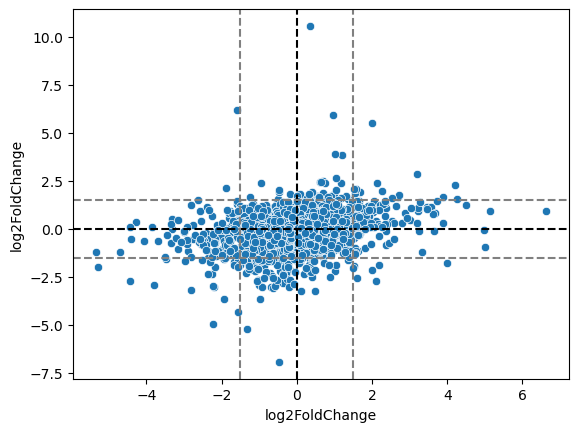

In [41]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Genewise log2-fold change in \n brome Drought')

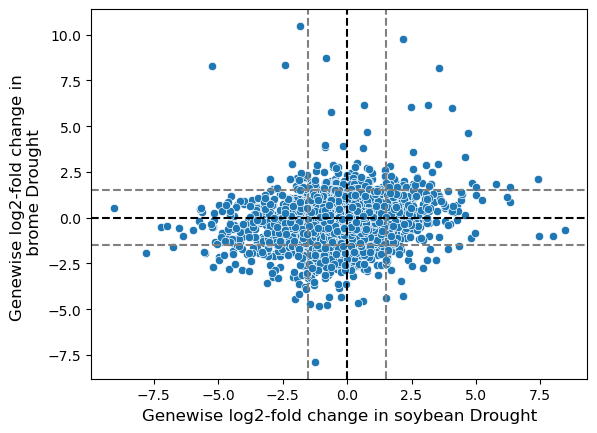

In [42]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Genewise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in \n brome Drought", fontsize = 12)

In [43]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]

In [44]:
new_merged_result['Classification'] = 'Non-substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_861687/1856289886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_

Text(0, 0.5, 'Genewise log2-fold change in Sorghum Drought')

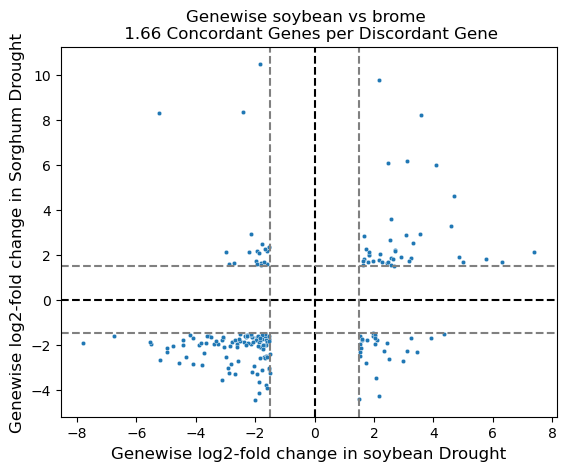

In [45]:
sns.scatterplot(data = new_merged_result.loc[new_merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10 )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Genewise soybean vs brome \n 1.66 Concordant Genes per Discordant Gene')
plt.xlabel("Genewise log2-fold change in soybean Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in Sorghum Drought", fontsize = 12)

In [46]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

3.0625

In [47]:
all_over_1

,Tomato,Arabi
213,2.682934,1.515375
220,4.586691,3.297212
289,4.846789,1.888013
709,3.574628,8.203993
880,2.562139,1.858827
982,1.651489,2.829491
1531,2.710450,2.219966
1809,1.819019,1.978667
2065,1.844447,2.004081
2170,1.791626,1.684134


In [ ]:
all_under_1

In [ ]:
merged_result

In [ ]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

In [ ]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

In [347]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [348]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [ ]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

In [ ]:
up_ortho

In [ ]:
up_arabi_ortho

In [ ]:
up

In [ ]:
up_arabi

In [ ]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)